In [1]:
import pandas as pd
import math
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 1000)
%matplotlib inline

In [2]:
train = pd.read_csv('..//data//train_data.csv')
test = pd.read_csv('..//data//test_data.csv')

In [3]:
print('The train data has {} rows and {} columns'.format(train.shape[0], train.shape[1]))
print('The test data has {} rows and {} columns'.format(test.shape[0], test.shape[1]))

The train data has 169307 rows and 43 columns
The test data has 91166 rows and 42 columns


In [4]:
## check target class
train['target'].value_counts(normalize=True)

0    0.583957
2    0.217676
1    0.198367
Name: target, dtype: float64

In [5]:
## check missing values
# train.isnull().sum(axis=0) ## there are no missing values.

### Feature Engineering

#### 1) For Continuous values

In [6]:
# # for cont_1 bin and do one hot encoding
train['cont_1_bin'] = 0 # 'less_50'
train['cont_1_bin'][train.cont_1 > 1000] = 1 # 'grt_1000'
train['cont_1_bin'][((train.cont_1 > 500) & (train.cont_1 <= 1000))] = 2 # '500_1000'
train['cont_1_bin'][((train.cont_1 > 100) & (train.cont_1 <= 500))] = 3 # '100_500'
train['cont_1_bin'][((train.cont_1 > 50) & (train.cont_1 <= 100))] = 4 # '50_100'
test['cont_1_bin'] = 0 # 'less_50'
test['cont_1_bin'][test.cont_1 > 1000] = 1 # 'grt_1000'
test['cont_1_bin'][((test.cont_1 > 500) & (test.cont_1 <= 1000))] = 2 # '500_1000'
test['cont_1_bin'][((test.cont_1 > 100) & (test.cont_1 <= 500))] = 3 # '100_500'
test['cont_1_bin'][((test.cont_1 > 50) & (test.cont_1 <= 100))] = 4 # '50_100'

# # add log for cont_1, cont_2, cont_3
cols = ['cont_1', 'cont_2', 'cont_3']
for eachCol in cols:
    train['log_' + eachCol] = np.log(train[eachCol])
    test['log_' + eachCol] = np.log(test[eachCol])
train = train.replace([np.inf, -np.inf], -1)
test = test.replace([np.inf, -np.inf], -1)

# # cont_4 to cont_18 are all lying between 0 - 1

In [7]:
train.head()

,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,cont_10,cont_11,cont_12,cont_13,cont_14,cont_15,cont_16,cont_17,cont_18,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,cat_10,cat_11,cat_12,cat_13,cat_14,cat_15,cat_16,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23,target,cont_1_bin,log_cont_1,log_cont_2,log_cont_3
0,cxcon_1,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,2,0,-1.0,6.939254,-1.0
1,cxcon_4,0,520,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,0,0,-1.0,6.253829,-1.0
2,cxcon_7,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,0,0,-1.0,6.939254,-1.0
3,cxcon_10,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,0,0,-1.0,6.939254,-1.0
4,cxcon_13,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,2,0,-1.0,6.939254,-1.0


#### 2) For Categorical values

In [8]:
# # cat_1, cat_2, cat_3, cat_7 => leave for now
# check importance and if possible treat them

# # leave cat_4, cat_8, cat_9, cat_11 as binary

# # cat_5 has 0, 1, 3 => make it 0, 1, 2
# later we can do one hot encoding!!
train.cat_5[train.cat_5 == 3] = 2
test.cat_5[test.cat_5 == 3] = 2

# # cat_6 - we can drop it as the test data has constant value
del train['cat_6']
del test['cat_6']

# # cat_10 - convert all values >= 2 as 2
# later we can do one hot encoding !!
train.cat_10[train.cat_10 >= 2] = 2
test.cat_10[test.cat_10 >= 2] = 2

# # cat_12, cat_13, cat_14, cat_16 - make it binary i.e. >=1 as 1 else 0
cols = ['cat_12', 'cat_13', 'cat_14', 'cat_16']
for eachCol in cols:
    train[eachCol][train[eachCol] >= 1] = 1
    test[eachCol][test[eachCol] >= 1] = 1

# # cat_15 - drop a row which has value = 2 (as it is not present in test data)
train = train[train.cat_15 != 2]

# # drop cat_17, cat_18 => constant columns
del train['cat_17']
del train['cat_18']

# # create two features using cat_20, cat_21 and cat_22 and cat_23
# equality flag
train['flag_20_21'] = train['cat_20'] == train['cat_21']
test['flag_20_21'] = test['cat_20'] == test['cat_21']
train['flag_22_23'] = train['cat_22'] == train['cat_23']
test['flag_22_23'] = test['cat_22'] == test['cat_23']
train.flag_20_21 = train.flag_20_21.astype(int)
train.flag_22_23 = train.flag_22_23.astype(int)
test.flag_20_21 = test.flag_20_21.astype(int)
test.flag_22_23 = test.flag_22_23.astype(int)

# # create log features for cat_22, cat_23
cols = ['cat_22', 'cat_23']
for eachCol in cols:
    train['log_' + eachCol] = np.log(train[eachCol])
    test['log_' + eachCol] = np.log(test[eachCol])
train = train.replace([np.inf, -np.inf], -1)
test = test.replace([np.inf, -np.inf], -1)

In [9]:
# # create bins for cat_20, cat_21, cat_22, cat_23
# for cat_20
# bins: 0, 1-31, 32-177, 178-198, 199-309, 310-419, 419-506, 507-510, 511
train['cat_20_bin'] = 0
train['cat_20_bin'][((train.cat_20 > 0) & (train.cat_20 < 32))] = 1
train['cat_20_bin'][((train.cat_20 >= 32) & (train.cat_20 < 179))] = 2
train['cat_20_bin'][((train.cat_20 >= 178) & (train.cat_20 < 199))] = 3
train['cat_20_bin'][((train.cat_20 >= 199) & (train.cat_20 < 310))] = 4
train['cat_20_bin'][((train.cat_20 >= 310) & (train.cat_20 < 419))] = 5
train['cat_20_bin'][((train.cat_20 >= 419) & (train.cat_20 < 507))] = 6
train['cat_20_bin'][((train.cat_20 >= 507) & (train.cat_20 < 511))] = 7
train['cat_20_bin'][train.cat_20 == 511] = 8
# for cat_21
# bins: 0, 1-23, 24-52, 53-93, 94-162, 163-187, 188-434, 435-465, 466-496, 497-510, 511
train['cat_21_bin'] = 0
train['cat_21_bin'][((train.cat_21 > 0) & (train.cat_21 < 24))] = 1
train['cat_21_bin'][((train.cat_21 >= 24) & (train.cat_21 < 53))] = 2
train['cat_21_bin'][((train.cat_21 >= 53) & (train.cat_21 < 94))] = 3
train['cat_21_bin'][((train.cat_21 >= 94) & (train.cat_21 < 163))] = 4
train['cat_21_bin'][((train.cat_21 >= 163) & (train.cat_21 < 188))] = 5
train['cat_21_bin'][((train.cat_21 >= 188) & (train.cat_21 < 435))] = 6
train['cat_21_bin'][((train.cat_21 >= 435) & (train.cat_21 < 466))] = 7
train['cat_21_bin'][((train.cat_21 >= 466) & (train.cat_21 < 497))] = 8
train['cat_21_bin'][((train.cat_21 >= 497) & (train.cat_21 < 511))] = 9
train['cat_21_bin'][train.cat_21 == 511] = 10
# for cat_22
# bins: 0, 1-47, 48-94, 95-141, 142-188, 189-236, 236-254, 255
train['cat_22_bin'] = 0
train['cat_22_bin'][((train.cat_22 > 0) & (train.cat_22 < 48))] = 1
train['cat_22_bin'][((train.cat_22 >= 48) & (train.cat_22 < 95))] = 2
train['cat_22_bin'][((train.cat_22 >= 95) & (train.cat_22 < 142))] = 3
train['cat_22_bin'][((train.cat_22 >= 142) & (train.cat_22 < 189))] = 4
train['cat_22_bin'][((train.cat_22 >= 189) & (train.cat_22 < 236))] = 5
train['cat_22_bin'][((train.cat_22 >= 236) & (train.cat_22 < 255))] = 6
train['cat_22_bin'][train.cat_22 == 255] = 7
# for cat_23
# bins: 0, 1-4.8, 4.9-8.7, 8.8-12.6, 12.7-16.5, 16.6-20.4, 20.5-24.3, 24.4-25.2, 25.3-39, 40-43.8, 43.9-242.7, 242.8-250, 250.1-254, 255
train['cat_23_bin'] = 0
train['cat_23_bin'][((train.cat_23 > 0) & (train.cat_23 < 4.9))] = 1
train['cat_23_bin'][((train.cat_23 >= 4.9) & (train.cat_23 < 8.8))] = 2
train['cat_23_bin'][((train.cat_23 >= 8.8) & (train.cat_23 < 12.7))] = 3
train['cat_23_bin'][((train.cat_23 >= 12.7) & (train.cat_23 < 16.6))] = 4
train['cat_23_bin'][((train.cat_23 >= 16.6) & (train.cat_23 < 20.5))] = 5
train['cat_23_bin'][((train.cat_23 >= 20.5) & (train.cat_23 < 24.4))] = 6
train['cat_23_bin'][((train.cat_23 >= 24.4) & (train.cat_23 < 25.3))] = 7
train['cat_23_bin'][((train.cat_23 >= 25.3) & (train.cat_23 < 40))] = 8
train['cat_23_bin'][((train.cat_23 >= 40) & (train.cat_23 < 43.9))] = 9
train['cat_23_bin'][((train.cat_23 >= 43.9) & (train.cat_23 < 242.8))] = 10
train['cat_23_bin'][((train.cat_23 >= 242.8) & (train.cat_23 < 250.1))] = 11
train['cat_23_bin'][((train.cat_23 >= 250.1) & (train.cat_23 < 255))] = 12
train['cat_23_bin'][train.cat_23 == 255] = 13

In [10]:
# # create bins for cat_20, cat_21, cat_22, cat_23
# for cat_20
# bins: 0, 1-31, 32-177, 178-198, 199-309, 310-419, 419-506, 507-510, 511
test['cat_20_bin'] = 0
test['cat_20_bin'][((test.cat_20 > 0) & (test.cat_20 < 32))] = 1
test['cat_20_bin'][((test.cat_20 >= 32) & (test.cat_20 < 179))] = 2
test['cat_20_bin'][((test.cat_20 >= 178) & (test.cat_20 < 199))] = 3
test['cat_20_bin'][((test.cat_20 >= 199) & (test.cat_20 < 310))] = 4
test['cat_20_bin'][((test.cat_20 >= 310) & (test.cat_20 < 419))] = 5
test['cat_20_bin'][((test.cat_20 >= 419) & (test.cat_20 < 507))] = 6
test['cat_20_bin'][((test.cat_20 >= 507) & (test.cat_20 < 511))] = 7
test['cat_20_bin'][test.cat_20 == 511] = 8
# for cat_21
# bins: 0, 1-23, 24-52, 53-93, 94-162, 163-187, 188-434, 435-465, 466-496, 497-510, 511
test['cat_21_bin'] = 0
test['cat_21_bin'][((test.cat_21 > 0) & (test.cat_21 < 24))] = 1
test['cat_21_bin'][((test.cat_21 >= 24) & (test.cat_21 < 53))] = 2
test['cat_21_bin'][((test.cat_21 >= 53) & (test.cat_21 < 94))] = 3
test['cat_21_bin'][((test.cat_21 >= 94) & (test.cat_21 < 163))] = 4
test['cat_21_bin'][((test.cat_21 >= 163) & (test.cat_21 < 188))] = 5
test['cat_21_bin'][((test.cat_21 >= 188) & (test.cat_21 < 435))] = 6
test['cat_21_bin'][((test.cat_21 >= 435) & (test.cat_21 < 466))] = 7
test['cat_21_bin'][((test.cat_21 >= 466) & (test.cat_21 < 497))] = 8
test['cat_21_bin'][((test.cat_21 >= 497) & (test.cat_21 < 511))] = 9
test['cat_21_bin'][test.cat_21 == 511] = 10
# for cat_22
# bins: 0, 1-47, 48-94, 95-141, 142-188, 189-236, 236-254, 255
test['cat_22_bin'] = 0
test['cat_22_bin'][((test.cat_22 > 0) & (test.cat_22 < 48))] = 1
test['cat_22_bin'][((test.cat_22 >= 48) & (test.cat_22 < 95))] = 2
test['cat_22_bin'][((test.cat_22 >= 95) & (test.cat_22 < 142))] = 3
test['cat_22_bin'][((test.cat_22 >= 142) & (test.cat_22 < 189))] = 4
test['cat_22_bin'][((test.cat_22 >= 189) & (test.cat_22 < 236))] = 5
test['cat_22_bin'][((test.cat_22 >= 236) & (test.cat_22 < 255))] = 6
test['cat_22_bin'][test.cat_22 == 255] = 7
# for cat_23
# bins: 0, 1-4.8, 4.9-8.7, 8.8-12.6, 12.7-16.5, 16.6-20.4, 20.5-24.3, 24.4-25.2, 25.3-39, 40-43.8, 43.9-242.7, 242.8-250, 250.1-254, 255
test['cat_23_bin'] = 0
test['cat_23_bin'][((test.cat_23 > 0) & (test.cat_23 < 4.9))] = 1
test['cat_23_bin'][((test.cat_23 >= 4.9) & (test.cat_23 < 8.8))] = 2
test['cat_23_bin'][((test.cat_23 >= 8.8) & (test.cat_23 < 12.7))] = 3
test['cat_23_bin'][((test.cat_23 >= 12.7) & (test.cat_23 < 16.6))] = 4
test['cat_23_bin'][((test.cat_23 >= 16.6) & (test.cat_23 < 20.5))] = 5
test['cat_23_bin'][((test.cat_23 >= 20.5) & (test.cat_23 < 24.4))] = 6
test['cat_23_bin'][((test.cat_23 >= 24.4) & (test.cat_23 < 25.3))] = 7
test['cat_23_bin'][((test.cat_23 >= 25.3) & (test.cat_23 < 40))] = 8
test['cat_23_bin'][((test.cat_23 >= 40) & (test.cat_23 < 43.9))] = 9
test['cat_23_bin'][((test.cat_23 >= 43.9) & (test.cat_23 < 242.8))] = 10
test['cat_23_bin'][((test.cat_23 >= 242.8) & (test.cat_23 < 250.1))] = 11
test['cat_23_bin'][((test.cat_23 >= 250.1) & (test.cat_23 < 255))] = 12
test['cat_23_bin'][test.cat_23 == 255] = 13

In [11]:
# # As they are not even picked by xgboost/lightgbm model - we can drop them !!
del train['cat_20_bin']
del train['cat_21_bin']
del train['cat_22_bin']
del train['cat_23_bin']

del test['cat_20_bin']
del test['cat_21_bin']
del test['cat_22_bin']
del test['cat_23_bin']

In [12]:
train.head()

,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,cont_10,cont_11,cont_12,cont_13,cont_14,cont_15,cont_16,cont_17,cont_18,cat_1,cat_2,cat_3,cat_4,cat_5,cat_7,cat_8,cat_9,cat_10,cat_11,cat_12,cat_13,cat_14,cat_15,cat_16,cat_19,cat_20,cat_21,cat_22,cat_23,target,cont_1_bin,log_cont_1,log_cont_2,log_cont_3,flag_20_21,flag_22_23,log_cat_22,log_cat_23
0,cxcon_1,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,2,0,-1.0,6.939254,-1.0,1,1,5.541264,5.541264
1,cxcon_4,0,520,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,0,0,-1.0,6.253829,-1.0,1,1,5.541264,5.541264
2,cxcon_7,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,0,0,-1.0,6.939254,-1.0,1,1,5.541264,5.541264
3,cxcon_10,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,0,0,-1.0,6.939254,-1.0,1,1,5.541264,5.541264
4,cxcon_13,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,2,0,-1.0,6.939254,-1.0,1,1,5.541264,5.541264


In [13]:
test.head()

,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,cont_10,cont_11,cont_12,cont_13,cont_14,cont_15,cont_16,cont_17,cont_18,cat_1,cat_2,cat_3,cat_4,cat_5,cat_7,cat_8,cat_9,cat_10,cat_11,cat_12,cat_13,cat_14,cat_15,cat_16,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23,cont_1_bin,log_cont_1,log_cont_2,log_cont_3,flag_20_21,flag_22_23,log_cat_22,log_cat_23
0,cxcon_2,0,331,6085,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,13,13,255,255,0,-1.0,5.802118,8.713582,1,1,5.541264,5.541264
1,cxcon_5,0,520,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,0,-1.0,6.253829,-1.000000,1,1,5.541264,5.541264
2,cxcon_8,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,0,-1.0,6.939254,-1.000000,1,1,5.541264,5.541264
3,cxcon_11,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,510,509,255,255,0,-1.0,6.939254,-1.000000,0,1,5.541264,5.541264
4,cxcon_14,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,0,-1.0,6.939254,-1.000000,1,1,5.541264,5.541264


#### 3) One hot Encoding

In [14]:
# # TO DO !!
# # do one hot encoding for cont_1_bin, cat_10, cat_5
cols = ['cat_10', 'cat_5', 'cont_1_bin']

### Model 1 - XGBOOST

In [15]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [16]:
feature_names = [x for x in train.columns if x not in ['connection_id','target']]
target = train['target']

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(train, target, train_size = 0.7, stratify = target, random_state = 294056)

In [18]:
X_train.head()

,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,cont_10,cont_11,cont_12,cont_13,cont_14,cont_15,cont_16,cont_17,cont_18,cat_1,cat_2,cat_3,cat_4,cat_5,cat_7,cat_8,cat_9,cat_10,cat_11,cat_12,cat_13,cat_14,cat_15,cat_16,cat_19,cat_20,cat_21,cat_22,cat_23,target,cont_1_bin,log_cont_1,log_cont_2,log_cont_3,flag_20_21,flag_22_23,log_cat_22,log_cat_23
21597,cxcon_64792,0,267,281,0.0,0.0,0.0,0.0,1.00,0.00,0.0,0.97,0.01,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,16,16,255,248,1,0,-1.0,5.587249,5.638355,1,0,5.541264,5.513429
164110,cxcon_492331,0,1032,0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,0,0,-1.0,6.939254,-1.000000,1,1,5.541264,5.541264
162618,cxcon_487855,0,1032,0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,510,510,255,255,0,0,-1.0,6.939254,-1.000000,1,1,5.541264,5.541264
89832,cxcon_269497,0,1032,0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,2,0,-1.0,6.939254,-1.000000,1,1,5.541264,5.541264
168035,cxcon_504106,0,0,0,1.0,1.0,0.0,0.0,0.06,0.05,0.0,0.01,0.07,0.0,0.0,1.0,1.0,0.0,0.0,1,13,8,0,0,0,0,0,0,0,0,0,0,0,0,0,146,9,255,2,0,0,-1.0,-1.000000,-1.000000,0,0,5.541264,0.693147


In [19]:
## function for multi-accuracy
from sklearn.metrics import accuracy_score
def multAcc(pred, dtrain):
    label = dtrain.get_label()
    acc = accuracy_score(label, pred)
    return 'maccuracy', acc

In [1]:
# default parameters
params = {'objective':'multi:softmax',
          'num_class':3,
          'learning_rate': 0.05,
          'reg_alpha' : 2.0,
          'random_state': 294056,
          # 'colsample_bytree': 0.7,
          # 'subsample': 0.8,
          # 'max_depth': 10,
          # 'min_child_weight': 11,
          # 'missing': -999
         }

In [21]:
dtrain = xgb.DMatrix(data=X_train[feature_names], label=y_train)
dvalid = xgb.DMatrix(data=X_valid[feature_names], label=y_valid)
dtest = xgb.DMatrix(data=test[feature_names])
watchlist = [(dtrain, 'train'),(dvalid, 'eval')]

In [22]:
clf1 = xgb.train(params, dtrain, 1000, watchlist, maximize=True, verbose_eval=20, early_stopping_rounds=40, feval=multAcc)
# 153 - 0.781359, 0.781127

[0]	train-merror:0.221164	eval-merror:0.221058	train-maccuracy:0.778836	eval-maccuracy:0.778942
Multiple eval metrics have been passed: 'eval-maccuracy' will be used for early stopping.

Will train until eval-maccuracy hasn't improved in 40 rounds.
[20]	train-merror:0.22016	eval-merror:0.220133	train-maccuracy:0.77984	eval-maccuracy:0.779867
[40]	train-merror:0.219426	eval-merror:0.219326	train-maccuracy:0.780574	eval-maccuracy:0.780674
[60]	train-merror:0.219122	eval-merror:0.219129	train-maccuracy:0.780878	eval-maccuracy:0.780871
[80]	train-merror:0.218886	eval-merror:0.219031	train-maccuracy:0.781114	eval-maccuracy:0.780969
[100]	train-merror:0.218818	eval-merror:0.219011	train-maccuracy:0.781182	eval-maccuracy:0.780989
[120]	train-merror:0.218734	eval-merror:0.218991	train-maccuracy:0.781266	eval-maccuracy:0.781009
[140]	train-merror:0.218717	eval-merror:0.218893	train-maccuracy:0.781283	eval-maccuracy:0.781107
[160]	train-merror:0.21859	eval-merror:0.218873	train-maccuracy:0.78141

In [28]:
pred = pd.DataFrame({'pred' : clf1.predict(dvalid)})

In [35]:
print(pd.DataFrame({'actual' : y_valid}).groupby('actual').size())
print(pred.groupby('pred').size())

actual
0    29660
1    10076
2    11056
dtype: int64
pred
0.0    40607
1.0    10164
2.0       21
dtype: int64


#### Save the model

In [21]:
clf1.save_model('..//model_objects//xgb_with_features_1.model')

#### Plot and check the importances

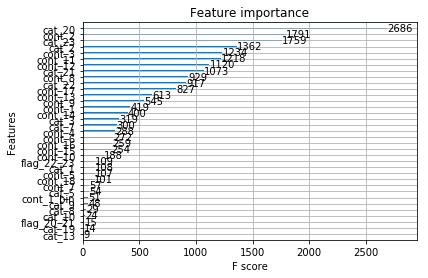

In [174]:
xgb.plot_importance(clf1)

In [176]:
from numpy import array
imp_vals = clf1.get_fscore()
total = sum(list(imp_vals.values()))
imp_vals_fs = [(i/total) * 100 for i in imp_vals.values()]
imp_vals = pd.DataFrame({'cols' : list(imp_vals.keys()), 'fscore' : imp_vals_fs})
imp_vals
# del imp_vals_fs
imp_vals.sort_values(['fscore'], ascending=[0]).head(10)

,cols,fscore
0,cat_20,13.775065
3,cont_2,9.185086
15,cat_23,9.020975
4,cat_2,6.984974
7,cont_3,6.328530
19,cont_11,6.246474
5,cont_12,5.743884
20,cat_21,5.502846
18,cont_8,4.764347
10,cat_22,4.702805


In [23]:
pred = clf1.predict(dtest)

In [248]:
## make submission
acc = '0.781166' # '0.781033'
sub = pd.read_csv('..//submissions//sample_submission.csv')
sub['target'] = pred
sub['target'] = sub['target'].astype(int)
sub.to_csv('..//submissions//xgb_sub6 (' + acc + ').csv', index=False)

***
### Model 2 - CATBOOST

In [19]:
from catboost import CatBoostClassifier

In [20]:
cat_train = np.array(X_train[feature_names])
cat_valid = np.array(X_valid[feature_names])
cat_train_labels = np.array(y_train)
cat_valid_labels = np.array(y_valid)
cat_test = np.array(test[feature_names])

In [64]:
# get categorical columns
cat_cols = [i for i, eachCol in enumerate(feature_names) if (eachCol.split('_')[0] == 'cat') or (eachCol == 'cont_1_bin')]

In [36]:
clf7 = CatBoostClassifier(iterations = 500, learning_rate = 0.05, depth = 2, loss_function = 'MultiClass')
clf7.fit(cat_train, cat_train_labels, cat_cols)

In [37]:
## calculate accuracy
pred7 = clf7.predict(cat_valid)
acc = accuracy_score(cat_valid_labels, pred7)
acc # 0.7796897149157348

0.7796897149157348

***
### Model 3 - LightGBM

In [314]:
import lightgbm as lgb

In [315]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train[feature_names], y_train)
lgb_valid = lgb.Dataset(X_valid[feature_names], y_valid, reference = lgb_train)

In [316]:
# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt', # gbdt
    'objective': 'multiclass',
    'metric': 'multi_error',
    'num_leaves': 50, # 50
    'learning_rate': 0.05, # 0.05
    'feature_fraction': 0.7, # 0.7
    'bagging_fraction': 0.8, # 0.8
    'bagging_freq': 5, # 5
    'verbose': 0, # 0
    'max_depth' : -1, # -1
    'num_class' : 3 # 3
}

In [317]:
clf8 = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=[lgb_train, lgb_valid],
                early_stopping_rounds = 40,
                verbose_eval=20) # 62nd iteration = 0.218877, 0.218853

Training until validation scores don't improve for 40 rounds.
[20]	training's multi_error: 0.219181	valid_1's multi_error: 0.219011
[40]	training's multi_error: 0.218995	valid_1's multi_error: 0.218991
[60]	training's multi_error: 0.218902	valid_1's multi_error: 0.218912
[80]	training's multi_error: 0.218683	valid_1's multi_error: 0.218893
[100]	training's multi_error: 0.218413	valid_1's multi_error: 0.219129
[120]	training's multi_error: 0.218076	valid_1's multi_error: 0.219149
Early stopping, best iteration is:
[83]	training's multi_error: 0.218641	valid_1's multi_error: 0.218853


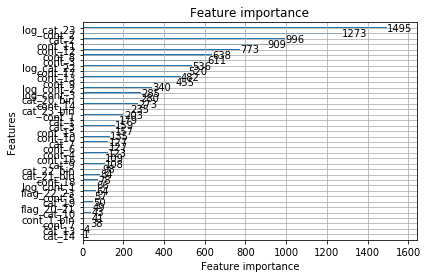

In [318]:
lgb.plot_importance(clf8)

In [319]:
## calculate accuracy
pred8 = clf8.predict(X_valid[feature_names])
pred8 = np.argmax(pred8, axis=1)
acc = accuracy_score(y_valid, pred8)
acc # 0.7811466372657111, 0.78125

0.7811466372657111

In [193]:
# # predict on the test set
pred8 = clf8.predict(test[feature_names])
pred8 = np.argmax(pred8, axis=1)

In [194]:
## make submission
sub = pd.read_csv('..//submissions//sample_submission.csv')
sub['target'] = pred8
sub['target'] = sub['target'].astype(int)
sub.to_csv('..//submissions//lgbm_sub3 (' + str(acc) + ').csv', index=False)

***
## H2O

### Model 4 - H20 GBM (Simple tuned)

In [22]:
# Load the H2O library and start up the H2O cluter locally on your machine
import h2o

# Number of threads, nthreads = -1, means use all cores on your machine
# max_mem_size is the maximum memory (in GB) to allocate to H2O
h2o.init(nthreads = -1, max_mem_size = 24)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.151-b12, mixed mode)
  Starting server from C:\Users\LEP5KOR\AppData\Local\Continuum\anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\LEP5KOR\AppData\Local\Temp\tmp3bzfd3d_
  JVM stdout: C:\Users\LEP5KOR\AppData\Local\Temp\tmp3bzfd3d_\h2o_LEP5KOR_started_from_python.out
  JVM stderr: C:\Users\LEP5KOR\AppData\Local\Temp\tmp3bzfd3d_\h2o_LEP5KOR_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster version:,3.14.0.7
H2O cluster version age:,1 month and 1 day
H2O cluster name:,H2O_from_python_LEP5KOR_j46iuu
H2O cluster total nodes:,1
H2O cluster free memory:,21.33 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [26]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [27]:
h2o_frame = train.copy()
h2o_frame['target2'] = h2o_frame['target']
h2o_frame['target'] = 'ZERO'
h2o_frame['target'][h2o_frame['target2'] == 1] = 'ONE'
h2o_frame['target'][h2o_frame['target2'] == 2] = 'TWO'
del h2o_frame['target2']
h2o_frame = h2o.H2OFrame(h2o_frame)
h2o_frame['target'].asfactor()
# Partition data into 70%, 15%, 15% chunks
splits = h2o_frame.split_frame(ratios=[0.7], seed = 294056)  
h2o_train = splits[0]
h2o_valid = splits[1]
h2o_test = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [28]:
y = 'target'
x = feature_names

In [180]:
clf10 = H2OGradientBoostingEstimator(model_id='gbm_fit_h2o', 
                                        ntrees=500, 
                                        score_tree_interval=5,     #used for early stopping
                                        stopping_rounds=40,         #used for early stopping
                                        stopping_metric='misclassification',     #used for early stopping
                                        stopping_tolerance=0.0005, #used for early stopping
                                        seed=1,
                                        nfolds=5)
clf10.train(x, y, training_frame = h2o_train, validation_frame = h2o_valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [181]:
clf10

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_fit_h2o


ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.15897521754931299
RMSE: 0.3987169642105951
LogLoss: 0.47025559575153536
Mean Per-Class Error: 0.33352096683951626
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



ONE,TWO,ZERO,Error,Rate
23478.0,0.0,1.0,0.0000426,"1 / 23,479"
54.0,40.0,25742.0,0.9984518,"25,796 / 25,836"
137.0,6.0,68988.0,0.0020685,"143 / 69,131"
23669.0,46.0,94731.0,0.2190028,"25,940 / 118,446"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.7809973
2,0.9995357
3,1.0



ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.15947483805236665
RMSE: 0.39934300801737677
LogLoss: 0.47255478308294135
Mean Per-Class Error: 0.33417392399739126
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



ONE,TWO,ZERO,Error,Rate
10097.0,1.0,8.0,0.0008906,"9 / 10,106"
29.0,5.0,10984.0,0.9995462,"11,013 / 11,018"
55.0,7.0,29674.0,0.0020850,"62 / 29,736"
10181.0,13.0,40666.0,0.2179316,"11,084 / 50,860"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.7820684
2,0.9992332
3,1.0



ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.16036209145578503
RMSE: 0.4004523585344267
LogLoss: 0.4744548101516807
Mean Per-Class Error: 0.3344085856996952
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



ONE,TWO,ZERO,Error,Rate
23462.0,0.0,17.0,0.0007241,"17 / 23,479"
61.0,6.0,25769.0,0.9997678,"25,830 / 25,836"
156.0,33.0,68942.0,0.0027339,"189 / 69,131"
23679.0,39.0,94728.0,0.2198132,"26,036 / 118,446"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.7801868
2,0.9992571
3,1.0


Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.7801836,0.0017957,0.7847158,0.780634,0.7782665,0.7774002,0.7799017
err,0.2198164,0.0017957,0.2152842,0.219366,0.2217335,0.2225998,0.2200983
err_count,5207.2,41.97237,5113.0,5197.0,5293.0,5240.0,5193.0
logloss,0.4744551,0.0014667,0.4707084,0.4746150,0.4766968,0.4759993,0.4742559
max_per_class_error,0.9997689,0.0001008,0.9998029,0.9998059,0.9996195,0.9996158,1.0
mean_per_class_accuracy,0.6655912,0.0001342,0.6655663,0.6655552,0.6657417,0.6658215,0.6652712
mean_per_class_error,0.3344088,0.0001342,0.3344337,0.3344448,0.3342583,0.3341785,0.3347288
mse,0.1603630,0.0007370,0.1585056,0.1602031,0.1612964,0.1614037,0.1604060
r2,0.7467847,0.0009841,0.7491904,0.7463365,0.7452037,0.7458465,0.7473468
rmse,0.4004513,0.0009214,0.3981276,0.4002538,0.4016172,0.4017508,0.4005072


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
,2017-11-22 13:53:54,5 min 49.119 sec,0.0,0.6666667,1.0986123,0.4348733,0.6666667,1.0986123,0.4332875
,2017-11-22 13:53:55,5 min 50.083 sec,5.0,0.5330996,0.7684601,0.2227175,0.5326947,0.7675591,0.2208219
,2017-11-22 13:53:56,5 min 51.052 sec,10.0,0.4692144,0.6352538,0.2225233,0.4685906,0.6340559,0.2206842
,2017-11-22 13:53:57,5 min 52.098 sec,15.0,0.4391865,0.5692037,0.2212401,0.4385897,0.5682514,0.2193669
,2017-11-22 13:53:59,5 min 54.282 sec,20.0,0.4241947,0.5330427,0.2203536,0.4237232,0.5325093,0.2187770
---,---,---,---,---,---,---,---,---,---
,2017-11-22 13:55:32,7 min 27.011 sec,395.0,0.3987170,0.4702556,0.2190028,0.3993430,0.4725548,0.2179316
,2017-11-22 13:55:33,7 min 28.586 sec,400.0,0.3987170,0.4702556,0.2190028,0.3993430,0.4725548,0.2179316
,2017-11-22 13:55:35,7 min 30.185 sec,405.0,0.3987170,0.4702556,0.2190028,0.3993430,0.4725548,0.2179316
,2017-11-22 13:55:36,7 min 31.789 sec,410.0,0.3987170,0.4702556,0.2190028,0.3993430,0.4725548,0.2179316



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
cat_20,136095.2812500,1.0,0.9016655
cat_3,4340.5937500,0.0318938,0.0287575
log_cont_3,2849.8662109,0.0209402,0.0188811
log_cont_2,1699.8697510,0.0124903,0.0112621
cont_14,1644.1068115,0.0120806,0.0108926
---,---,---,---
cat_16,0.0241430,0.0000002,0.0000002
cat_14,0.0033143,0.0000000,0.0000000
cat_4,0.0,0.0,0.0
cat_12,0.0,0.0,0.0



See the whole table with table.as_data_frame()


In [178]:
pred10 = clf10.predict(h2o_valid).as_data_frame()

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [179]:
acc = accuracy_score(h2o_valid['target'].as_data_frame(), pred10['predict'])
print(acc) # 0.782068423122

0.782068423122


In [125]:
pred10 = clf10.predict(h2o_test).as_data_frame()
pred10['target2'] = 0
pred10['target2'][pred10['predict'] == 'ONE'] = 1
pred10['target2'][pred10['predict'] == 'TWO'] = 2

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [127]:
## make submission
sub = pd.read_csv('..//submissions//sample_submission.csv')
del sub['target']
sub['target'] = list(pred10['target2'])
sub.head()
sub['target'] = sub['target'].astype(int)
sub.to_csv('..//submissions//h2o_gbm_sub3 (' + str(acc) + ').csv', index=False)